In [ ]:
期权的价差交易策略
https://zhuanlan.zhihu.com/p/218031128

In [ ]:
牛市价差组合（bull spread）——买低卖高

In [ ]:
1.看涨期权构造牛市价差组合。该策略持有一个较低执行价格的欧式看涨期权多头头寸，
同时持有一个较高执行价格的欧式看涨期权空头头寸，这两个期权的基础资产和合约期
限均相同。如果投资者认为未来基础资产价格将保持震荡上行的趋势，就可采用牛市价
差策略。

In [ ]:
牛市价差组合(看涨期权)
较低执行价格的欧式看涨期权多头：Max(ST-K1,0)-C1
较高执行价格的欧式看涨期权空头：C2-Max(ST-K2,0)
组合：Max(ST-K1,0)-C1+C2-Max(ST-K2,0)
ST>K2: C2-C1+K2-K1 (多头均执行)
K1<ST<K2: C2-C1+ST-K1 (较低执行价格的多头执行，较高不执行)
St<K: C2-C1 (多头均不执行)

K1:较低期权的执行价格；
K2:较高期权的执行价格；
C1:较低执行价格期权的当前价格；
C2:较高执行价格期权的当前价格；
S0:标的资产当前单位净值价格；
ST:标的资产期权到期日单位净值价格；
    

In [ ]:
【案例分析1】A机构要运用沪深300ETF期权构建牛市价差策略。一个期权是较低的
执行价格K1=3.6元，期权费为C1=0.15元;另一个期权是较高执行价格K2=4.1元，
期权费为C2=0.1元，策略构建当天沪深300指数ETF基金的净值是3.8630，沪深300
指数点数为3872.7701。A机构运用一张执行价格3.6元的沪深300ETF看涨期权多头
头寸和一张执行价格4.1元的沪深300 ETF看涨期权空头头寸构建牛市价差策略(假定
到期日指数收盘价的范围在3000~5000）。

【注】一张期权的基础资产是10000份沪深300ETF。

①假定沪深300指数跌至3000点：

单位净值=3000×3.8630/3872.7701=2.992

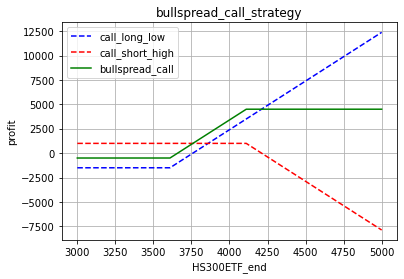

In [6]:
#牛市价差组合(看涨期权)
import numpy as np
import matplotlib.pyplot as plt
def bullspread_call(K1,K2,C1,C2,P0,P0_index,Pt_index,N1,N2,N_underlying):
    '''K1:较低期权的执行价格；
    K2:较高期权的执行价格；
    C1:较低执行价格期权的当前价格；
    C2:较高执行价格期权的当前价格；
    P0:标的资产当前单位净值价格；
    P0_index：标的资产当前收盘点位；
    Pt_index：期权到期日标的资产收盘点位；
    N1:较低执行价格的期权多头头寸数量；
    N2:较高执行价格的期权多头头寸数量；
    N_underlying：1张标的资产期权基础资产是多少份单位净值.''' 
    Pt=P0*Pt_index/P0_index  #期权到期日标的资产基金净值数组
    call_long_low = N1*N_underlying*(np.maximum(Pt-K1,0)-C1)
    call_short_high = N2*N_underlying*(C2-np.maximum(Pt-K2,0))
    bullspread_call = call_long_low + call_short_high
    return Pt_index,call_long_low,call_short_high,bullspread_call

A=bullspread_call(K1=3.6,K2=4.1,C1=0.15,C2=0.1,P0=3.8630,P0_index=3872.7701,Pt_index=np.linspace(3000,5000,500),
                N1=1,N2=1,N_underlying=10000)

plt.title('bullspread_call_strategy')
plt.xlabel('HS300ETF_end')
plt.ylabel('profit')
plt.plot(A[0],A[1],'b--',label='call_long_low')
plt.plot(A[0],A[2],'r--',label='call_short_high')
plt.plot(A[0],A[3],'g-',label='bullspread_call')
plt.legend()
plt.grid()

    
    

In [ ]:
看跌期权构造牛市价差组合：用看跌期权构造牛市价差策略可以由较低执行价格的欧
式看跌期权多头头寸和较高执行价格的欧式看跌期权的空头头寸构造而成。
https://zhuanlan.zhihu.com/p/218031128

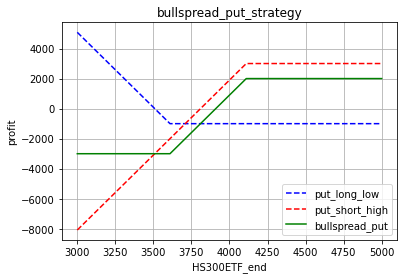

In [19]:
#牛市价差组合(看跌期权)
import numpy as np
import matplotlib.pyplot as plt
def bullspread_put(K1,K2,P1,P2,P0,P0_index,Pt_index,N1,N2,N_underlying):
    '''K1:较低期权的执行价格；
    K2:较高期权的执行价格；
    C1:较低执行价格期权的当前价格；
    C2:较高执行价格期权的当前价格；
    P0:标的资产当前单位净值价格；
    P0_index：标的资产当前收盘点位；
    Pt_index：期权到期日标的资产收盘点位；
    N1:较低执行价格的期权多头头寸数量；
    N2:较高执行价格的期权多头头寸数量；
    N_underlying：1张标的资产期权基础资产是多少份单位净值.''' 
    Pt = P0*Pt_index/P0_index
    put_long_low = N1* N_underlying*(np.maximum(K1-Pt,0)-P1)
    put_short_high = N2*N_underlying*(P2 -np.maximum(K2-Pt,0))
    bullspread_put = put_long_low+put_short_high
    return Pt_index,put_long_low,put_short_high,bullspread_put

B = bullspread_put(K1=3.6,K2=4.1,P1=0.1,P2=0.3,P0=3.8630,P0_index=3872.7701,Pt_index=np.linspace(3000,5000,500),N1=1,N2=1,N_underlying=10000)

plt.title('bullspread_put_strategy')
plt.xlabel('HS300ETF_end')
plt.ylabel('profit')
plt.plot(B[0],B[1],'b--',label='put_long_low')
plt.plot(B[0],B[2],'r--',label='put_short_high')
plt.plot(B[0],B[3],'g-',label='bullspread_put')
plt.legend()
plt.grid()


    

In [ ]:
熊市价差策略
https://zhuanlan.zhihu.com/p/218031128

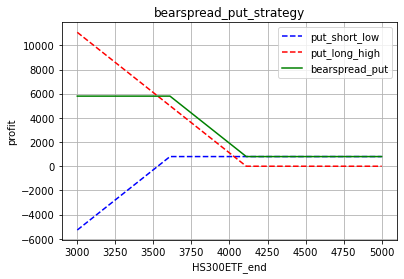

In [20]:
#看跌期权构造熊市价差策略  
def bearspread_put(K1,K2,P1,P2,P0,P0_index,Pt_index,N1,N2,N_underlying):
    '''K1:较低期权的执行价格；
    K2:较高期权的执行价格；
    P1:较低执行价格期权的当前价格；
    P2:较高执行价格期权的当前价格；
    P0:标的资产当前单位净值价格；
    P0_index：标的资产当前收盘点位；
    Pt_index：期权到期日标的资产收盘点位；
    N1:较低执行价格的期权空头头寸数量；
    N2:较高执行价格的期权多头头寸数量；
    N_underlying：1张标的资产期权基础资产是多少份单位净值.''' 
    Pt = P0*Pt_index/P0_index
    put_short_low = N1*N_underlying*(P1-np.maximum(K1-Pt,0)) 
    put_long_high = N2*N_underlying*(np.maximum(K2-Pt,0))
    bearspread_put = put_short_low+put_long_high
    return Pt_index, put_short_low,put_long_high,bearspread_put

C=bearspread_put(K1=3.6,K2=4.1,P1=0.08,P2=0.25,P0=3.8630,P0_index=3872.7701,Pt_index=np.linspace(3000,5000,500),
                N1=1,N2=1,N_underlying=10000)

plt.title('bearspread_put_strategy')
plt.xlabel('HS300ETF_end')
plt.ylabel('profit')
plt.plot(C[0],C[1],'b--',label='put_short_low')
plt.plot(C[0],C[2],'r--',label='put_long_high')
plt.plot(C[0],C[3],'g-',label='bearspread_put')
plt.legend()
plt.grid()



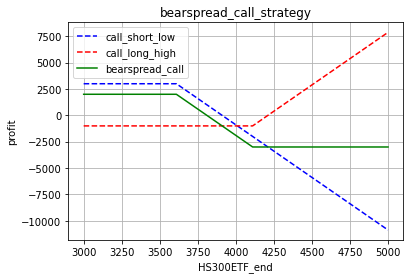

In [23]:
#看涨期权构造熊市价差组合
def bearspread_call(K1,K2,C1,C2,P0,P0_index,Pt_index,N1,N2,N_underlying):
    '''K1:较低期权的执行价格；
    K2:较高期权的执行价格；
    P1:较低执行价格期权的当前价格；
    P2:较高执行价格期权的当前价格；
    P0:标的资产当前单位净值价格；
    P0_index：标的资产当前收盘点位；
    Pt_index：期权到期日标的资产收盘点位；
    N1:较低执行价格的期权空头头寸数量；
    N2:较高执行价格的期权多头头寸数量；
    N_underlying：1张标的资产期权基础资产是多少份单位净值.''' 
    Pt = P0*Pt_index/P0_index
    call_short_low=N1*N_underlying*(C1-np.maximum(Pt-K1,0))
    call_long_high=N2*N_underlying*(np.maximum(Pt-K2,0)-C2)
    bearspread_call=call_short_low+call_long_high
    return Pt_index,call_short_low,call_long_high,bearspread_call

D=bearspread_call(K1=3.6,K2=4.1,C1=0.3,C2=0.1,P0=3.8630,P0_index=3872.7701,Pt_index=np.linspace(3000,5000,500),
                N1=1,N2=1,N_underlying=10000) 

plt.title('bearspread_call_strategy')
plt.xlabel('HS300ETF_end')
plt.ylabel('profit')
plt.plot(D[0],D[1],'b--',label='call_short_low')
plt.plot(D[0],D[2],'r--',label='call_long_high')
plt.plot(D[0],D[3],'g-',label='bearspread_call')
plt.legend()
plt.grid()   


In [ ]:
蝶式价差策略(butterfly spread)
https://zhuanlan.zhihu.com/p/218031128

In [ ]:
1.采用看涨期权构造蝶式价差策略。看涨期权蝶式价差由3种K不同而其他条件相同的
期权构成，构造方式是一个较低执行价格K1的欧式看涨期权多头 + 一个较高执行价
格K3的欧式看涨期权多头头寸 + 两个执行价格K2的欧式看涨期权空头头寸，其中即
K2=(K1+K3)/2。一般来讲K2接近于当前基础资产价格。蝶式价差策略对于那些认
为基础资产价格不会有太大波动的投资者而言会比较合适，因为该策略仅仅需要较少
的期初投资成本。

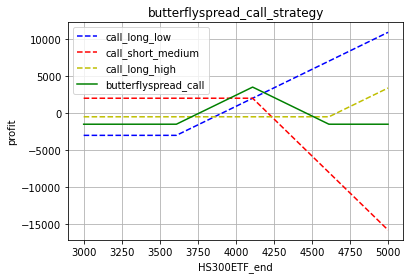

In [24]:
#蝶式看涨期权价差策略
def butterflyspread_call(K1,K2,K3,C1,C2,C3,P0,P0_index,Pt_index,N1,N2,N3,N_underlying):
    '''K1:较低期权的执行价格；
    K2:中间的期权执行价格；
    K3:较低期的期权执行价格;
    C1:较低执行价格看涨期权的当前价格；
    C2:中间价格看涨期权的当前价格；
    C3:较高执行价格看涨期权的当前价格
    P0:标的资产当前单位净值价格；
    P0_index：标的资产当前收盘点位；
    Pt_index：期权到期日标的资产收盘点位；
    N1:较低价格看涨期权头寸数量；
    N2:中间价格看跌期权头寸数量；
    N3:较高价格看涨期权头寸数量;
    N_underlying：1张标的资产期权基础资产是多少份单位净值.'''  
    Pt=P0*Pt_index/P0_index  #期权到期日标的资产基金净值数组
    call_long_low = N1*N_underlying*(np.maximum(Pt-K1,0)-C1)
    call_short_medium = N2*N_underlying*(C2-np.maximum(Pt-K2,0))
    call_long_high = N3*N_underlying*(np.maximum(Pt-K3,0)-C3)
    butterflyspread_call = call_long_low+call_short_medium+call_long_high
    return Pt_index,call_long_low,call_short_medium,call_long_high,butterflyspread_call

F=butterflyspread_call(K1=3.6,K2=4.1,K3=4.6,C1=0.3,C2=0.1,C3=0.05,
            P0=3.8630,P0_index=3872.7701,Pt_index=np.linspace(3000,5000,500),
            N1=1,N2=2,N3=1,N_underlying=10000) 

plt.title('butterflyspread_call_strategy')
plt.xlabel('HS300ETF_end')
plt.ylabel('profit')
plt.plot(F[0],F[1],'b--',label='call_long_low')
plt.plot(F[0],F[2],'r--',label='call_short_medium')
plt.plot(F[0],F[3],'y--',label='call_long_high')
plt.plot(F[0],F[4],'g-',label='butterflyspread_call')
plt.legend()
plt.grid()   



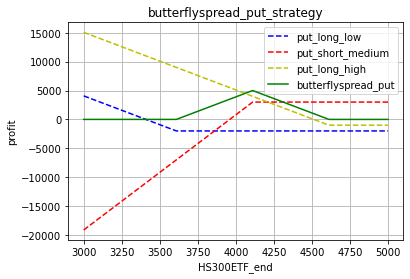

In [26]:
#蝶式看跌期权价差策略
def butterflyspread_put(K1,K2,K3,P1,P2,P3,P0,P0_index,Pt_index,N1,N2,N3,N_underlying):
    '''K1:较低期权的执行价格；
    K2:中间的期权执行价格；
    K3:较低期的期权执行价格;
    P1:较低执行价格看涨期权的当前价格；
    P2:中间价格看涨期权的当前价格；
    P3:较高执行价格看涨期权的当前价格
    P0:标的资产当前单位净值价格；
    P0_index：标的资产当前收盘点位；
    Pt_index：期权到期日标的资产收盘点位；
    N1:较低价格看涨期权头寸数量；
    N2:中间价格看跌期权头寸数量；
    N3:较高价格看涨期权头寸数量;
    N_underlying：1张标的资产期权基础资产是多少份单位净值.''' 
    Pt=P0*Pt_index/P0_index  #期权到期日标的资产基金净值数组
    put_long_low = N1*N_underlying*(np.maximum(K1-Pt,0)-P1)
    put_short_medium=N2*N_underlying*(P2-np.maximum(K2-Pt,0))
    put_long_high=N3*N_underlying*(np.maximum(K3-Pt,0)-P3)
    butterflyspread_put=put_long_low+put_short_medium+put_long_high
    return Pt_index,put_long_low,put_short_medium,put_long_high,butterflyspread_put

G=butterflyspread_put(K1=3.6,K2=4.1,K3=4.6,P1=0.2,P2=0.15,P3=0.1,
            P0=3.8630,P0_index=3872.7701,Pt_index=np.linspace(3000,5000,500),
            N1=1,N2=2,N3=1,N_underlying=10000)

plt.title('butterflyspread_put_strategy')
plt.xlabel('HS300ETF_end')
plt.ylabel('profit')
plt.plot(G[0],G[1],'b--',label='put_long_low')
plt.plot(G[0],G[2],'r--',label='put_short_medium')
plt.plot(G[0],G[3],'y--',label='put_long_high')
plt.plot(G[0],G[4],'g-',label='butterflyspread_put')
plt.legend()
plt.grid() 



    

In [ ]:
盒式价差策略（box spread）
盒式价差策略也称为箱式价差策略，是由执行价格为K1与K2的欧式看涨期权所构
成的牛市价差策略与具有相同执行价格欧式看跌期权所构成的熊市价差策略的一
个组合。其中，K1<K2.


In [32]:
bull: call_long_low/ call_short_high
    bull_call
bear: put_long_high/ put_short_low
    bear_put  

IndentationError: unexpected indent (<ipython-input-32-2d37ad72b5d2>, line 2)

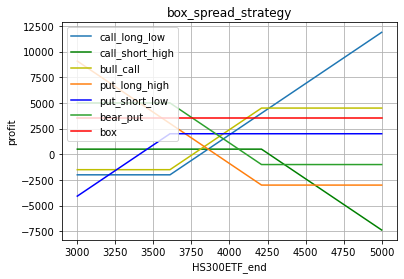

In [45]:
def box_spread(K1,K2,C1,C2,P1,P2,P0,P0_index,Pt_index,N_call,N_put,N_underlying):
    Pt = P0*Pt_index/P0_index
    call_long_low = N_call*N_underlying*(np.maximum(Pt-K1,0)-C1)
    call_short_high = N_call*N_underlying*(C2-np.maximum(Pt-K2,0))
    bull_call =call_long_low+call_short_high
    put_long_high = N_put*N_underlying*(np.maximum(K2-Pt,0)-P2)
    put_short_low = N_put*N_underlying*(P1-np.maximum((K1-Pt),0))
    bear_put=put_long_high+put_short_low
    box = bull_call+bear_put
    return Pt_index,call_long_low,call_short_high,bull_call,put_long_high,put_short_low,bear_put,box

#H=box_spread(K1=3.6,K2=4.2,C1=0.2,C2=0.05,P1=0.2,P2=0.3,P0=3.8630,P0_index=3872.7701,Pt_index=np.linspace(3000,5000,500),N_call=1,N_put=1,N_underlying=10000)
H= box_spread(K1=3.6,K2=4.2,C1=0.2,C2=0.05,P1=0.2,P2=0.3,
            P0=3.8630,P0_index=3872.7701,Pt_index=np.linspace(3000,5000,500),
            N_call=1,N_put=1,N_underlying=10000) 

plt.title('box_spread_strategy')
plt.xlabel('HS300ETF_end')
plt.ylabel('profit')
plt.plot(H[0],H[1],'-',label='call_long_low')
plt.plot(H[0],H[2],'g-',label='call_short_high')
plt.plot(H[0],H[3],'y-',label='bull_call')
plt.plot(H[0],H[4],'-',label='put_long_high')
plt.plot(H[0],H[5],'b-',label='put_short_low')
plt.plot(H[0],H[6],'-',label='bear_put')
plt.plot(H[0],H[7],'r-',label='box')

plt.legend()
plt.grid() 


    